# Load and visualize models

In [ ]:
# HIDE CODE


import os, sys
sys.path.insert(0, './')
from utils.plotting import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
%matplotlib inline
set_style()

In [2]:
device_idx = 0
device = f'cuda:{device_idx}'

## Load model

In [3]:
from base.utils_model import load_quick

root = 'Dropbox/git/PoissonVAE'  # base directory for the project (update to match your setup)
root = add_home(f"{root}/checkpoints/")  # contains model checkpoints
print(os.listdir(root))

['gaussian-<lin|lin>-vH16_mach-0_(2024_11_28,14:19)', 'laplace-<lin|lin>-vH16_mach-0_(2024_11_28,14:19)', 'categorical-<lin|lin>-vH16_mach-0_(2024_11_28,14:22)', 'poisson-<lin|lin>-vH16_mach-0_(2024_11_28,15:26)']


In [4]:
models2load = {
    'poisson': 'poisson-<lin|lin>-vH16_mach-0_(2024_11_28,15:26)',
    'categorical': 'categorical-<lin|lin>-vH16_mach-0_(2024_11_28,14:22)',
    'gaussian': 'gaussian-<lin|lin>-vH16_mach-0_(2024_11_28,14:19)',
    'laplace': 'laplace-<lin|lin>-vH16_mach-0_(2024_11_28,14:19)',
}

In [5]:
trainers = {}
for name, load_path in models2load.items():
    try:
        trainers[name], _ = load_quick(
            pjoin(root, load_path),
            lite=True,
            device=device,
            verbose=True,
        )
    except FileNotFoundError:
        continue


# params: 262.7 K

# params: 262.7 K

# params: 394.2 K

# params: 394.2 K


## Plot dictionary $\Phi$

poisson


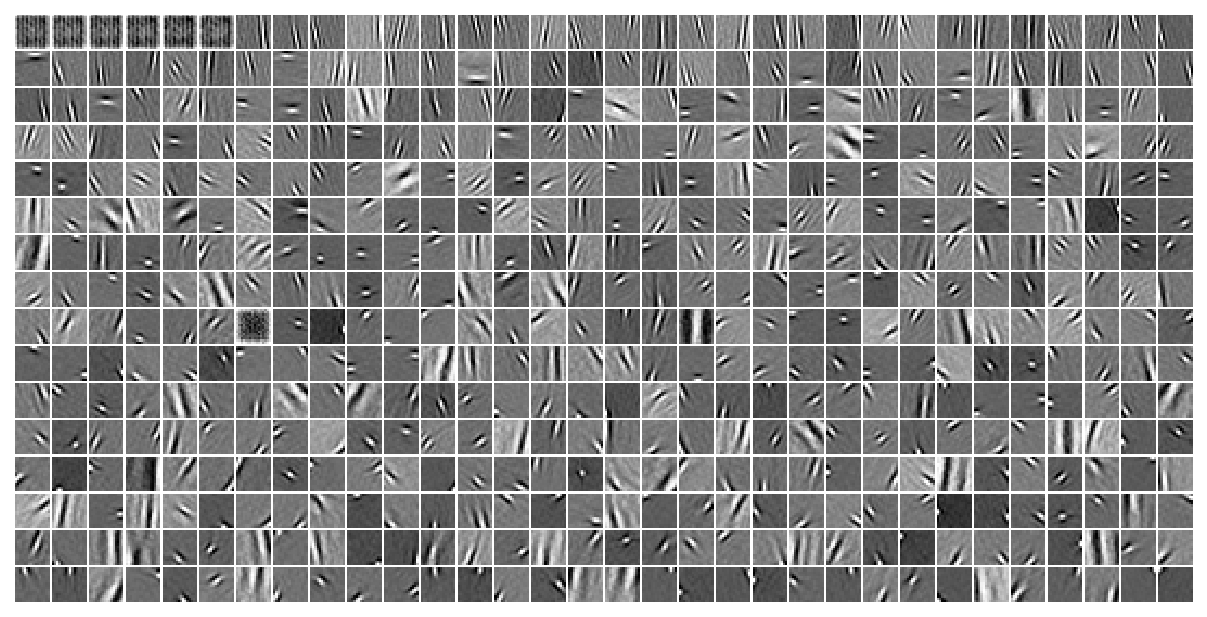

categorical


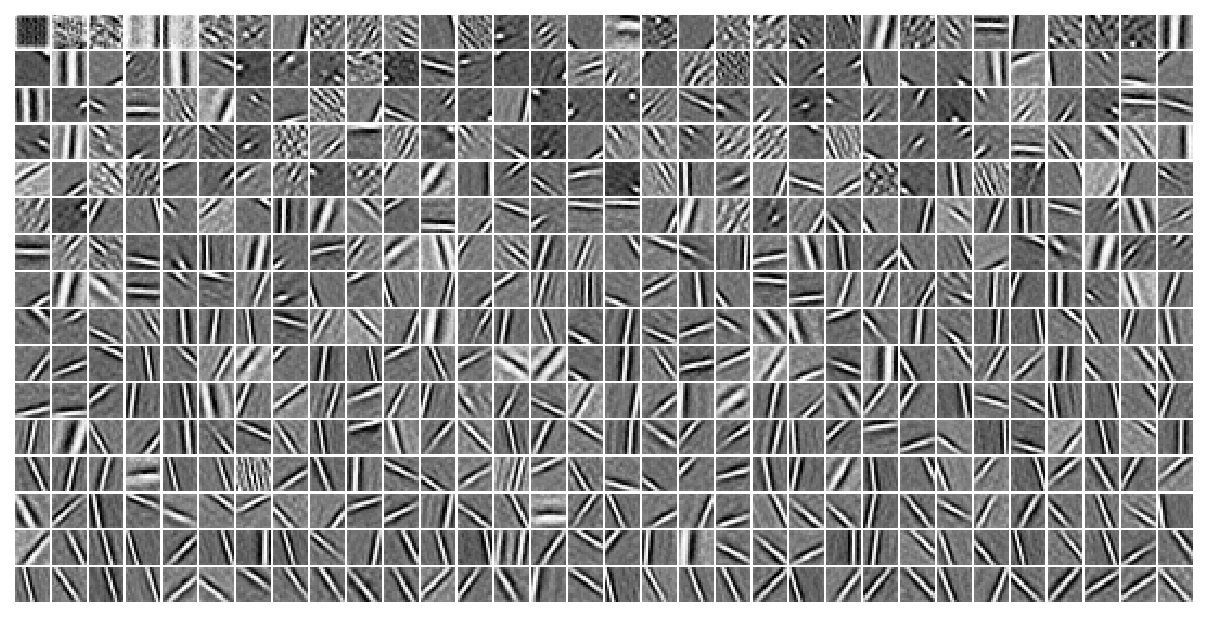

gaussian


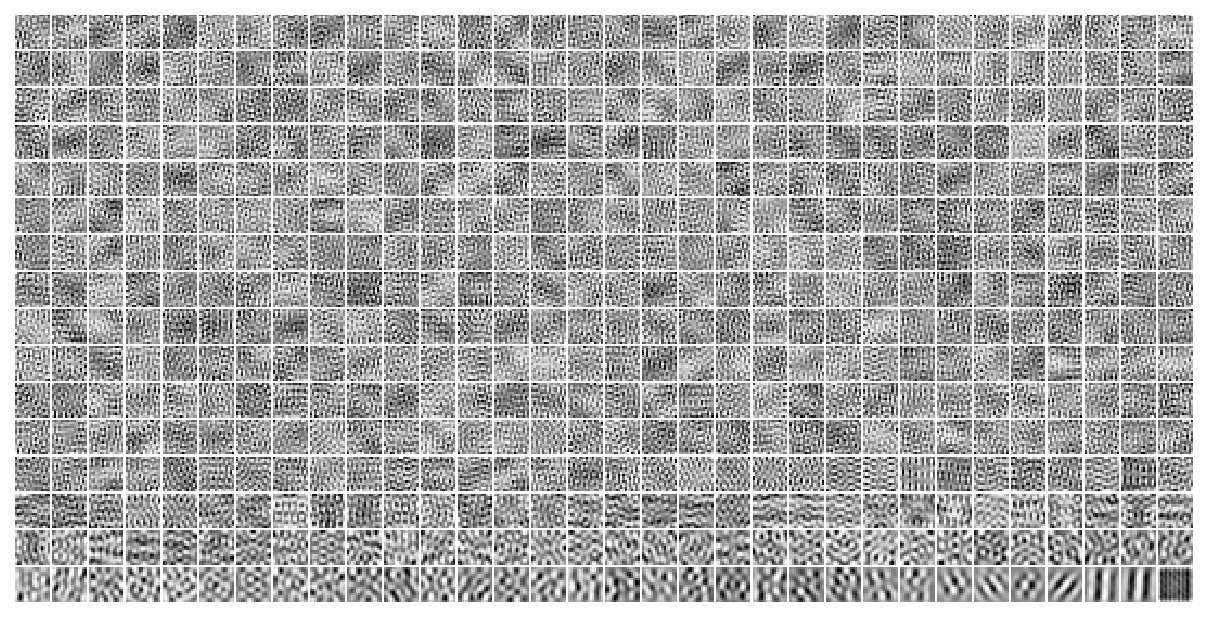

laplace


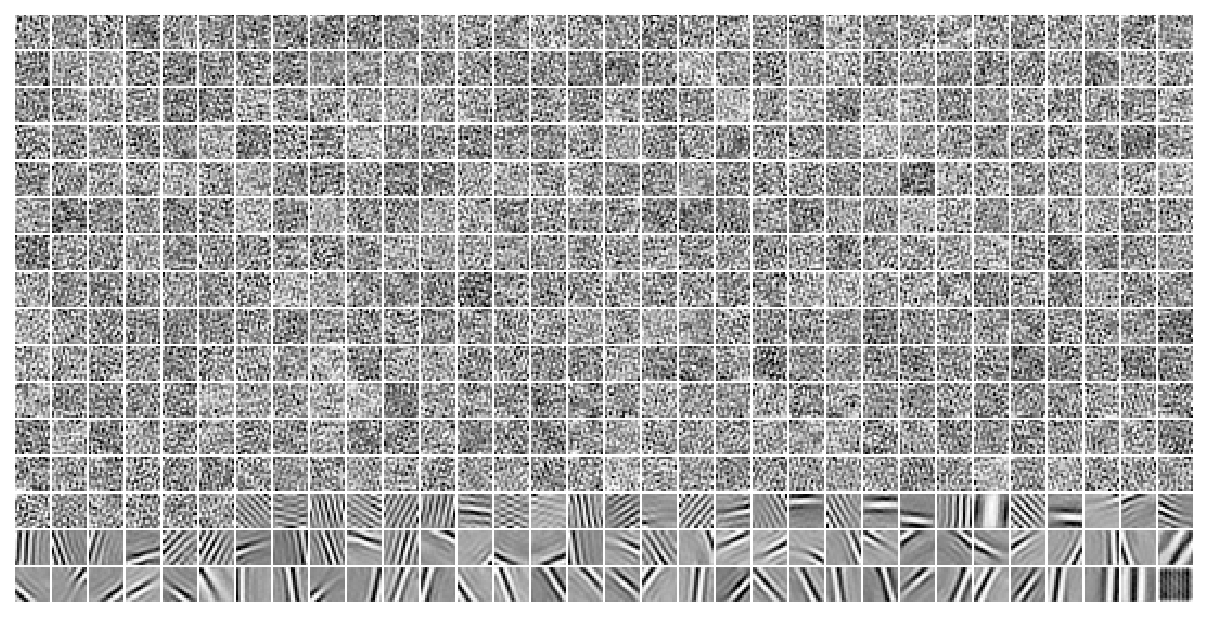

In [6]:
for name, tr in trainers.items():
    print(name)
    data, loss, etc = tr.validate()
    if tr.model.cfg.type == 'categorical':
        order = etc['logits'].mean(0).ravel()
        order = np.argsort(order)[::-1]
    else:
        order = np.argsort(loss['kl_diag'])
    fig, ax = tr.model.show(order=order, dpi=150)